In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
file_path = os.path.join("Resources/heart_disease_data.csv")

In [3]:
df = pd.read_csv(file_path)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Text(0, 0.5, 'Stroke Count')

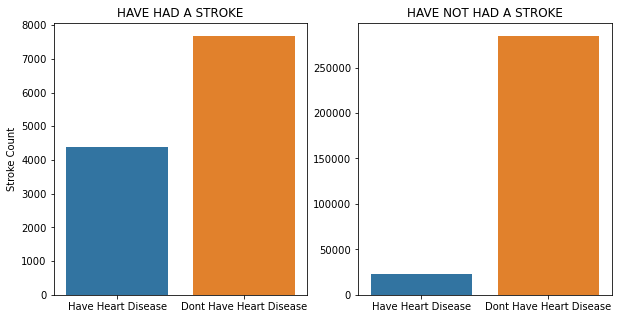

In [4]:
stroke_df = df['HeartDisease'].loc[df["Stroke"]=='Yes'].to_frame()

HDstroke_yes_count = stroke_df[stroke_df['HeartDisease'] == 'Yes'].count()[0] 
HDstroke_no_count = stroke_df[stroke_df['HeartDisease'] == 'No'].count()[0]


###########################################################################

stroke_df = df['HeartDisease'].loc[df["Stroke"]=='No'].to_frame()

NOHDstroke_yes_count = stroke_df[stroke_df['HeartDisease'] == 'Yes'].count()[0] 
NOHDstroke_no_count = stroke_df[stroke_df['HeartDisease'] == 'No'].count()[0]

fig, axes = plt.subplots(1, 2, figsize =(10,5))

sns.barplot(x=['Have Heart Disease', 'Dont Have Heart Disease'], y=[HDstroke_yes_count, HDstroke_no_count], ax=axes[0])
sns.barplot(x=['Have Heart Disease', 'Dont Have Heart Disease'], y=[NOHDstroke_yes_count, NOHDstroke_no_count], ax=axes[1])

axes[0].set_title('HAVE HAD A STROKE')
axes[1].set_title('HAVE NOT HAD A STROKE')

axes[0].set_ylabel('Stroke Count')

## People with STROKE whove had HD - then looking whether they had a HD or not

Text(0, 0.5, 'Difficulty Walking Count')

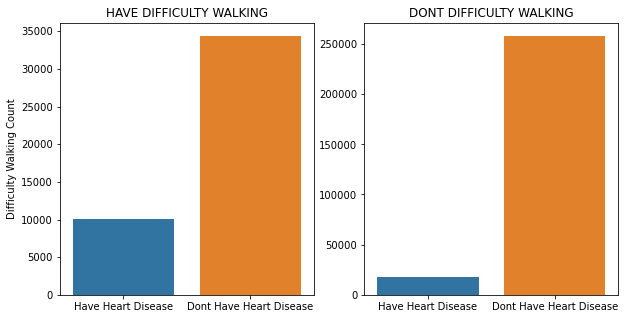

In [5]:
walking_df = df['HeartDisease'].loc[df["DiffWalking"]=='Yes'].to_frame()

HDwalking_yes_count = walking_df[walking_df['HeartDisease'] == 'Yes'].count()[0] 
HDwalking_no_count = walking_df[walking_df['HeartDisease'] == 'No'].count()[0]

###########################################################################

walking_df = df['HeartDisease'].loc[df["DiffWalking"]=='No'].to_frame()

NOHDwalking_yes_count = walking_df[walking_df['HeartDisease'] == 'Yes'].count()[0] 
NOHDHDwalking_no_count = walking_df[walking_df['HeartDisease'] == 'No'].count()[0]


fig, axes = plt.subplots(1, 2, figsize =(10,5))

sns.barplot(x=['Have Heart Disease', 'Dont Have Heart Disease'], y=[HDwalking_yes_count, HDwalking_no_count], ax=axes[0])
sns.barplot(x=['Have Heart Disease', 'Dont Have Heart Disease'], y=[NOHDwalking_yes_count, NOHDHDwalking_no_count], ax=axes[1])

axes[0].set_title('HAVE DIFFICULTY WALKING')
axes[1].set_title('DONT DIFFICULTY WALKING')

axes[0].set_ylabel('Difficulty Walking Count')


# If you have HD, most likely have 

In [6]:
def HD_create_graphs(attribute):  
    plt.figure(figsize =(10,5))
    
    modular_df = df[attribute].loc[df["HeartDisease"]=='Yes'].to_frame()
    
    list_counts = []
    for x in range(len(df[attribute].unique())):
        list_counts.append(modular_df[modular_df[attribute] == df[attribute].unique()[x]].count()[0])
        
    ax = sns.barplot(x=df[attribute].unique(), y=list_counts)
    ax.set(ylabel = 'Heart Disease Count', xlabel = f'{attribute}')
    plt.title(f'People with Heart Disease vs {attribute}')
    plt.show()
    

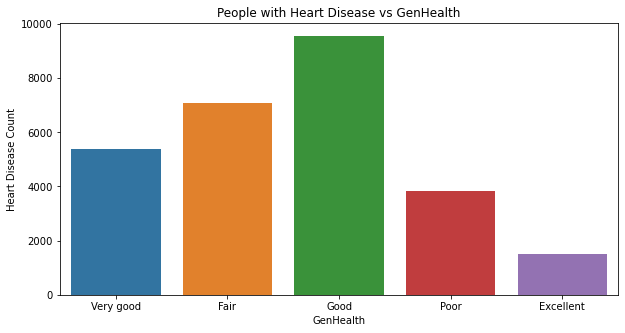

In [7]:
HD_create_graphs('GenHealth')

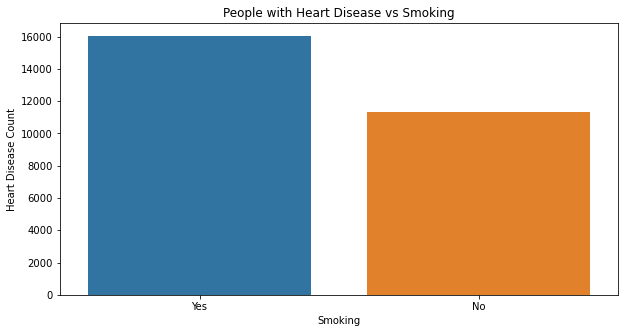

In [8]:
HD_create_graphs('Smoking')

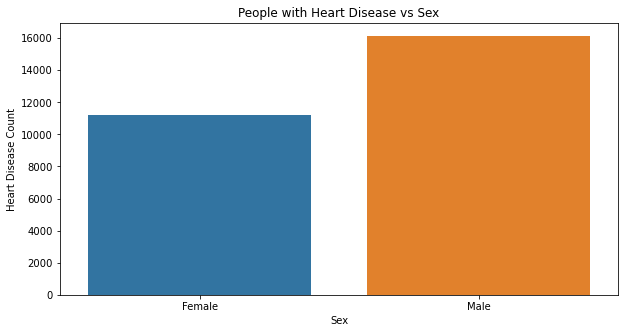

In [9]:
HD_create_graphs('Sex')

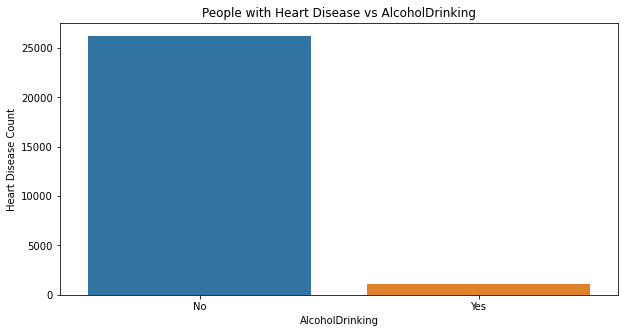

In [10]:
# Create a split graph
HD_create_graphs('AlcoholDrinking')

# STROKE DATASET

In [11]:
main_stroke_df = pd.read_csv('Resources/stroke_data.csv')

x={0: 'No', 1: 'Yes'}
main_stroke_df = main_stroke_df.replace(x)

main_stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,No,No,No,children,Rural,95.12,18.0,NaN,No
1,30468,Male,58.0,Yes,No,Yes,Private,Urban,87.96,39.2,never smoked,No
2,16523,Female,8.0,No,No,No,Private,Urban,110.89,17.6,NaN,No
3,56543,Female,70.0,No,No,Yes,Private,Rural,69.04,35.9,formerly smoked,No
4,46136,Male,14.0,No,No,No,Never_worked,Rural,161.28,19.1,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,No,No,No,children,Urban,58.64,20.4,never smoked,No
43396,5450,Female,56.0,No,No,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,No
43397,28375,Female,82.0,Yes,No,Yes,Private,Urban,91.94,28.9,formerly smoked,No
43398,27973,Male,40.0,No,No,Yes,Private,Urban,99.16,33.2,never smoked,No


In [12]:
main_stroke_df = main_stroke_df[main_stroke_df['gender'] != 'Other']

In [13]:
def Stroke_create_graphs(attribute, parameter):  
    plt.figure(figsize =(10, 5))
    
    modular_df = main_stroke_df[attribute].loc[main_stroke_df["stroke"]==parameter].to_frame()
    
    list_counts = []
    for x in range(len(main_stroke_df[attribute].unique())):
        list_counts.append(modular_df[modular_df[attribute] == main_stroke_df[attribute].unique()[x]].count()[0])
        
    ax = sns.barplot(x=main_stroke_df[attribute].unique(), y=list_counts)
    ax.set(ylabel = 'Stroke Count', xlabel = f'{attribute}')
    if (parameter == 'Yes'):
        plt.title(f'People who HAVE had a Stroke vs {attribute}')
    elif (parameter == "No"):
        plt.title(f'People who HAVE NOT had a Stroke vs {attribute}')

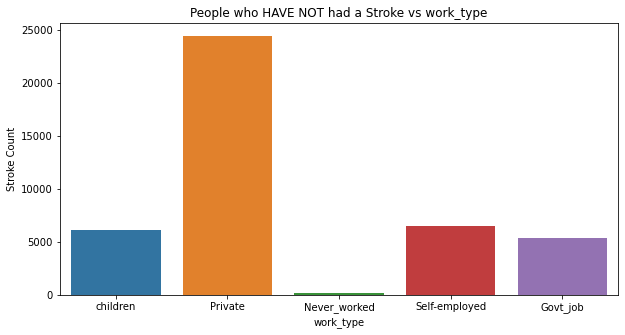

In [14]:
Stroke_create_graphs("work_type", "No")

Text(0, 0.5, 'Stroke Count')

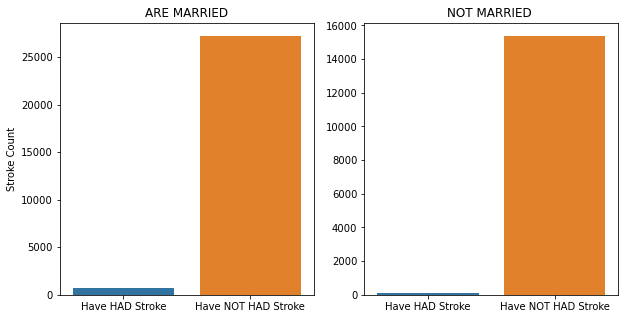

In [15]:
married_df = main_stroke_df['stroke'].loc[main_stroke_df["ever_married"]=='Yes'].to_frame()

HDwalking_yes_count = married_df[married_df['stroke'] == 'Yes'].count()[0] 
HDwalking_no_count = married_df[married_df['stroke'] == 'No'].count()[0]

###########################################################################

married_df = main_stroke_df['stroke'].loc[main_stroke_df["ever_married"]=='No'].to_frame()

NOHDwalking_yes_count = married_df[married_df['stroke'] == 'Yes'].count()[0] 
NOHDHDwalking_no_count = married_df[married_df['stroke'] == 'No'].count()[0]


fig, axes = plt.subplots(1, 2, figsize =(10,5))

sns.barplot(x=['Have HAD Stroke', 'Have NOT HAD Stroke'], y=[HDwalking_yes_count, HDwalking_no_count], ax=axes[0])
sns.barplot(x=['Have HAD Stroke', 'Have NOT HAD Stroke'], y=[NOHDwalking_yes_count, NOHDHDwalking_no_count], ax=axes[1])

axes[0].set_title('ARE MARRIED')
axes[1].set_title('NOT MARRIED ')

axes[0].set_ylabel('Stroke Count')

# Good time where Jigar can use SQL - precentage wise

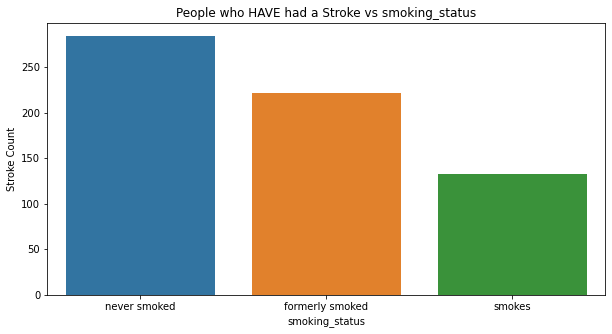

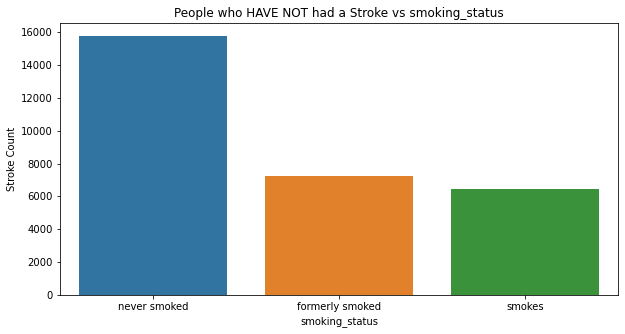

In [16]:
Stroke_create_graphs("smoking_status", "Yes")
Stroke_create_graphs("smoking_status", "No")

# Just have more people who have never smoked - other speculations here

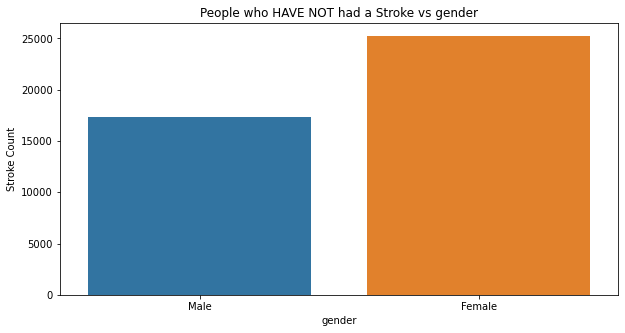

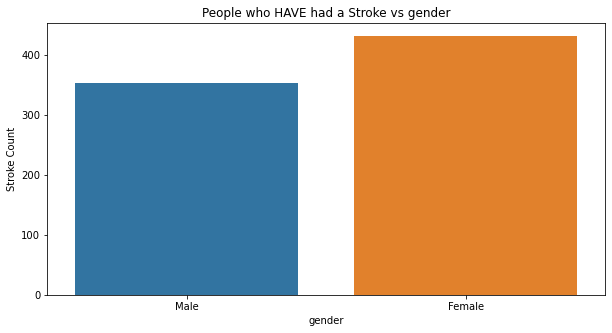

In [17]:
Stroke_create_graphs("gender", "No")
Stroke_create_graphs("gender", "Yes")

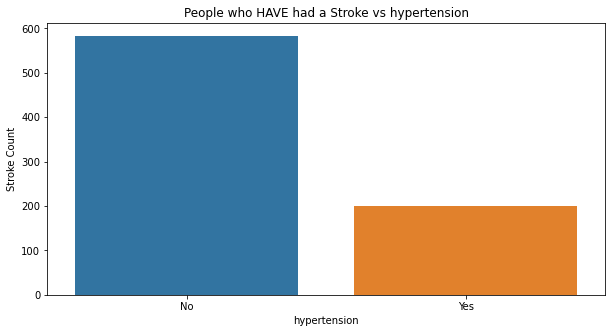

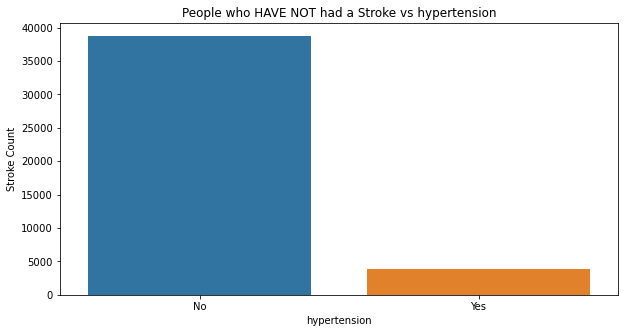

In [18]:
Stroke_create_graphs("hypertension", "Yes")
Stroke_create_graphs("hypertension", "No")